# Spectre d'une corde vibrante

On considère une corde de longueur $L$ fixée à ses deux extrémités $x=0$ et $x=L$.

On peut exprimer la vibration de la corde comme une superposition de modes propres.

$$ y(x,t)=\sum_{n=1}^{\infty} y_{0,n} \sin\left( n \frac{\pi}{L} x\right) \sin \left(n \frac{\pi c}{L} t+\varphi_n\right)$$

Les coefficients $y_{0,n}$ et $\varphi_n$ sont déterminés par la donnée du profi initial en amplitude $y(x,0)$ et en vitesse $\displaystyle\frac{\partial y}{\partial t}(x,0)$.

Soit $f$ la fonction impaire, de période $2L$, qui coïncide avec le profil initial en amplitude sur  l'intervalle $[0,L]$: 

$$\forall x \in[0,L] \quad f(x)=y(x,0) \quad (1)$$

Cette fonction étant impaire, elle s'exprime sous forme d'une série de Fourier en sinus:

$$ f(x)=\sum_{n=1}^{\infty} b_n \sin\left( n \frac{2\pi}{2L} x\right)=
\sum_{n=1}^{\infty} b_n\sin\left( n \frac{\pi}{L} x\right) $$

Or

$$ y(x,0)=\sum_{n=1}^{\infty} y_{0,n} \sin\left( n \frac{\pi}{L} x\right) \sin \left(\varphi_n\right)$$

On déduit alors de l'égalité $(1)$ la relation:

$$\boxed{b_n=y_{0,n}\sin\varphi_n}$$


Soit $g$ une fonction impaire, de période $2L$, qui coïncide avec le profil initial de vitesse sur 
l'intervalle $[0,L]$: 

$$\forall x \in[0,L] \quad g(x)=\frac{\partial y}{\partial t}(x,0) \quad (2)$$

Cette fonction s'exprime sous forme d'une série de Fourier:

$$ g(x)=\sum_{n=1}^{\infty} b'_n \sin\left( n \frac{2\pi}{2L} x\right)=
\sum_{n=1}^{\infty} b'_n\sin\left( n \frac{\pi}{L} x\right) $$

Or

$$ \frac{\partial y}{\partial t}(x,t)=\sum_{n=1}^{\infty} y_{0,n} \sin\left( n \frac{\pi}{L} x\right) \frac{n\pi c}{L}\cos \left(n \frac{\pi c}{L} t+\varphi_n\right)$$


À t=0

$$ \frac{\partial y}{\partial t}(x,0)=\sum_{n=1}^{\infty} y_{0,n} \frac{n\pi c}{L}\sin\left( n \frac{\pi}{L} x\right) \cos \left(\varphi_n\right)$$

On déduit alors de l'égalité $(2)$ la relation:

$$\boxed{b'_n=y_{0,n}\frac{n\pi c}{L}\cos\varphi_n}$$

La détermination des coefficients de Fourier $b_n$ et $b'_n$ permet d'exprimer $y_{0,n}$ et $\varphi_n$.

## Corde pincée de type "clavecin"

On considère une corde pincée (type corde de clavecin).

Le profil initial de la corde est supposé triangulaire, le pincement s'effectuant en $x=a$. On suppose la corde initialement au repos: 

$$\forall x\in[0,L] \quad  \displaystyle\frac{\partial y}{\partial t}(x,0)=0.$$

On a alors, pour tout $n$, $b'_n=0$ et donc $\cos\varphi_n=0$. On choisit $\varphi_n=\frac{\pi}{2}$. On a alors $y_{0,n}=b_n$.

Le signal s'exprime donc sous la forme:

$$ y(x,t)=\sum_{n=1}^{\infty} b_n \sin\left( n \frac{\pi}{L} x\right) \cos \left(n \frac{\pi c}{L} t\right)$$



In [1]:
%display latex

In [2]:
L=1      #corde de 1m
a=1/7    # on pince la corde au septième de sa longueur
h=0.1    # amplitude du pincement 
c=2*L*440 #on suppose que la corde joue un la4

### Profil initial

On définit d'abord le profil initial en amplitude de la corde.

In [3]:
f1(x)=h*x/a;f2(x)=h-(h/(L-a))*(x-a);f3(x)=-f1(-x);f4(x)=-f2(-x);
f=piecewise([ [(-L,-a),f4], [(-a,0),f3] ,  [(0,a),f1], [(a,L),f2] ]) 

/home/valerie/SageMath/local/lib/python3.9/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/home/valerie/SageMath/local/lib/python3.9/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


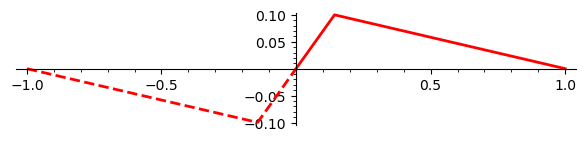

In [4]:
gf0=plot(f,0,L,color='red',thickness=2,aspect_ratio=2) #tracé du profil initial de la corde
gf0imp=plot(f,-L,0,color='red',linestyle='dashed',thickness=2,aspect_ratio=2)#prologement impair
show(gf0+gf0imp)

Le trait plein correspond au profil initial de la corde et le trait pointillé à son prologement impair.

### Spectre

On trace tout d'abord le spectre en amplitude (ici $y_{0,n}=b_n$ en fonction de $n$), correspondant aux coefficients en sinus du développement en série de Fourier du profil initial en amplitude.

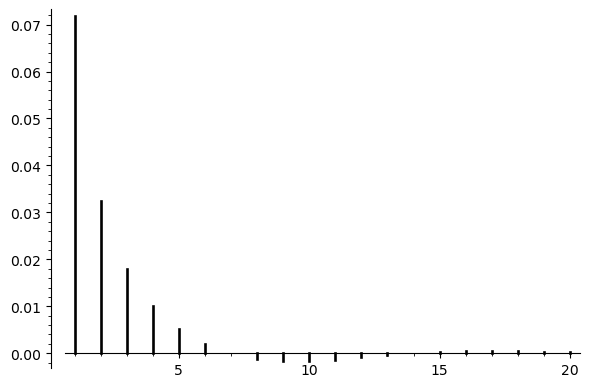

In [5]:
spectrea1=Graphics()
for i in range(1,21): 
    spectrea1+=line([ (i,0) , (i,f.fourier_series_sine_coefficient(i,L)) ],thickness=1.9,color='black')    
show(spectrea1)

Lorsqu'on pince la corde au septième de sa longueur, l'harmonique de rang 7 (ou multiple de 7) disparaît.

On peut tracer également son spectre en puissance

In [6]:
spectrep1=Graphics()
for i in range(1,21): 
    spectrep1+=line([ (i,0) , (i,(f.fourier_series_sine_coefficient(i,L))^2) ],thickness=1.9,color='black')    
show(spectrep1)

On souhaite désormais visualiser la vibration ultérieure de la corde.

### Reconstitution du signal

In [7]:
var('x,t,k') #la déclaration de la variable k est indispensable avant d'utiliser sum
y(x,t)=sum((f.fourier_series_sine_coefficient(k,L))*cos(k*pi*c*t/L)*sin(k*pi*x/L),k,1,21)
y(x,t)

-1/1105966856966400*(0.001461749844138588*pi*cos(18480*pi*t)*sin(21*pi*x) + (-0.0015348373363455175*pi - 4516031332612.802*sin(1/7*pi))*cos(17600*pi*t)*sin(20*pi*x) + (0.0016156182487847553*pi - 5003912833920.002*sin(2/7*pi))*cos(16720*pi*t)*sin(19*pi*x) + (-0.0017053748181616861*pi - 5575347324213.336*sin(3/7*pi))*cos(15840*pi*t)*sin(18*pi*x) + (0.001805690983935903*pi - 6250562398080.003*sin(3/7*pi))*cos(14960*pi*t)*sin(17*pi*x) + (-0.001918546670431897*pi - 7056298957207.503*sin(2/7*pi))*cos(14080*pi*t)*sin(16*pi*x) + (0.0020464497817940233*pi - 8028500146867.203*sin(1/7*pi))*cos(13200*pi*t)*sin(15*pi*x) - 0.0021926247662078817*pi*cos(12320*pi*t)*sin(14*pi*x) + (0.0023612882097623347*pi + 10688831556480.004*sin(1/7*pi))*cos(11440*pi*t)*sin(13*pi*x) + (-0.0025580622272425293*pi + 12544531479480.006*sin(2/7*pi))*cos(10560*pi*t)*sin(12*pi*x) + (0.0027906133388100316*pi + 14929029198720.006*sin(3/7*pi))*cos(9680*pi*t)*sin(11*pi*x) + (-0.003069674672691035*pi + 18064125330451.203*sin(3/7*pi))*cos(8800*pi*t)*sin(10*pi*x) + (0.0034107496363233723*pi + 22301389296853.344*sin(2/7*pi))*cos(7920*pi*t)*sin(9*pi*x) + (-0.0038370933408637935*pi + 28225195828830.01*sin(1/7*pi))*cos(7040*pi*t)*sin(8*pi*x) + 0.0043852495324157624*pi*cos(6160*pi*t)*sin(7*pi*x) + (-0.005116124454485059*pi - 50178125917920.02*sin(1/7*pi))*cos(5280*pi*t)*sin(6*pi*x) + (0.00613934934538207*pi - 72256501321804.84*sin(2/7*pi))*cos(4400*pi*t)*sin(5*pi*x) + (-0.007674186681727588*pi - 112900783315320.05*sin(3/7*pi))*cos(3520*pi*t)*sin(4*pi*x) + (0.010232248908970117*pi - 200712503671680.1*sin(3/7*pi))*cos(2640*pi*t)*sin(3*pi*x) + (-0.015348373363455176*pi - 451603133261280.2*sin(2/7*pi))*cos(1760*pi*t)*sin(2*pi*x) + (0.030696746726910352*pi - 1806412533045120.8*sin(1/7*pi))*cos(880*pi*t)*sin(pi*x))/pi^2

Animation with 100 frames
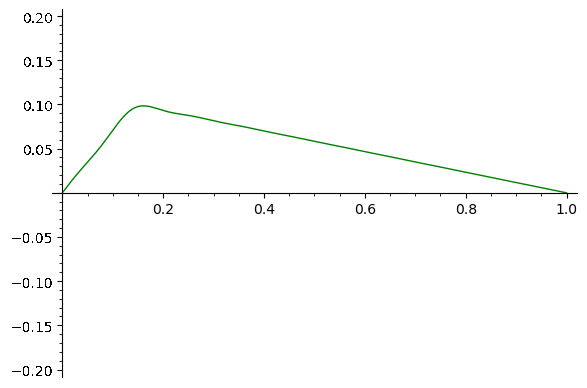

In [8]:
vibr=animate([plot(y(x,k*0.01*(1/440)),color='green',xmin=0,xmax=1,ymin=-0.2,ymax=0.2) for k in range(0,100)])
vibr.show(delay=0.1)

## Corde frappée type "piano"

On considère une corde frappée (type corde de piano).

La corde est supposée initialement non déformée: $\forall x \in[0,L] \quad y(x,0)=0$.

On modélise la frappe du marteau par un profil rectangulaire de vitesse.

On a alors, pour tout $n$, $b_n=0$ et donc $\sin\varphi_n=0$. On choisit $\varphi_n=0$. On en déduit $b'_n=y_{0,n}\frac{n\pi c}{L}$. 


Le signal s'exprime sous la forme:

$$ y(x,t)=\sum_{n=1}^{\infty}  \frac{Lb'_n}{n\pi c} \sin\left( n \frac{\pi}{L} x\right) \sin \left(n \frac{\pi c}{L} t\right)$$






In [9]:
v=5 #vitesse de frappe (les autres données étant inchangées)

### Profil initial en vitesse

La frappe de la corde s'effectue sur une largeur $\frac{L}{10}$ autour de $x=a$.

In [10]:
g1(x)=0;g2(x)=-v;
g=piecewise([ [(-L,-a-L/20),g1],  [(-a-L/20,-a+L/20),-g2] , [(-a+L/20,a-L/20),g1], 
             [(a-L/20,a+L/20),g2],  [(a+L/20,L),g1] ]) 

In [11]:
gg0=plot(g,0,L,color='red',thickness=2,aspect_ratio=0.1) #tracé du profil initial de la corde
gg0imp=plot(g,-L,0,color='red',linestyle='dashed',thickness=2,aspect_ratio=0.1)#prologement impair
show(gg0+gg0imp)

### Spectre

On représente $\frac{L}{n\pi c}b'_n$ en fonction de $n$, puis $\left(\frac{L}{n\pi c}b'_n\right)^2$ en fonction de $n$.

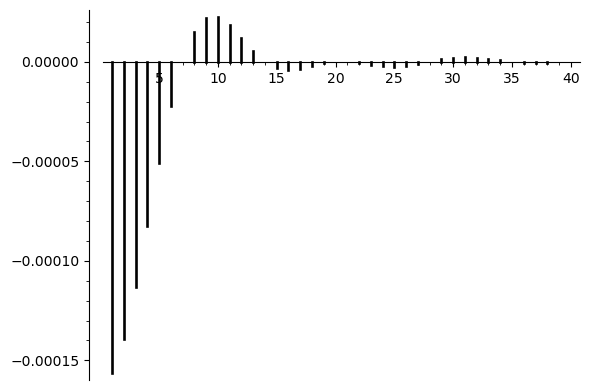

In [12]:
spectrea2=Graphics()
for i in range(1,41): 
    spectrea2+=line([ (i,0) , (i,(L/(i*pi*c))*g.fourier_series_sine_coefficient(i,L)) ],thickness=1.9,color='black')    
show(spectrea2)

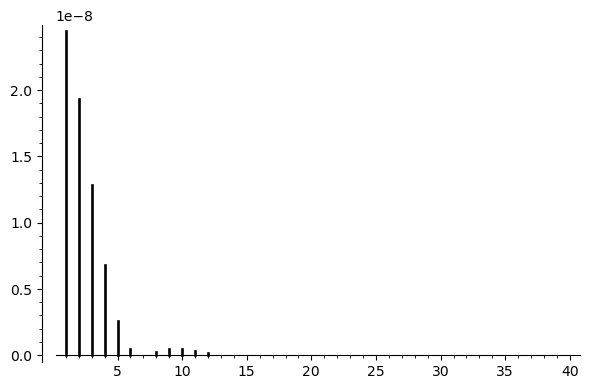

In [13]:
spectrep2=Graphics()
for i in range(1,41): 
    spectrep2+=line([ (i,0) , (i,((L/(i*pi*c))*g.fourier_series_sine_coefficient(i,L))^2)] ,thickness=1.9,color='black')    
show(spectrep2)

### Reconstitution du signal

In [14]:
var('x,t,k') #la déclaration de la variable k est indispensable avant d'utiliser sum
yp(x,t)=sum((g.fourier_series_sine_coefficient(k,L))*L*sin(k*pi*c*t/L)*sin(k*pi*x/L)/(k*pi*c),k,1,20)

Animation with 100 frames
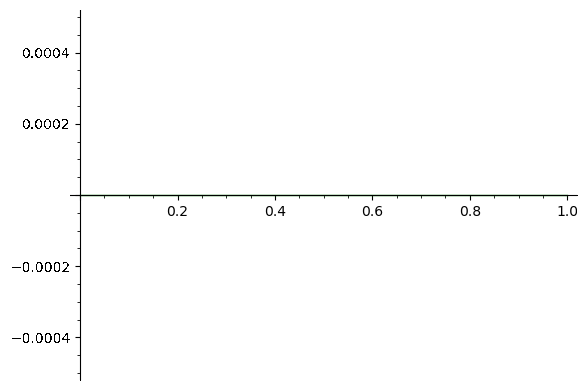

In [15]:
vibrp=animate([plot(yp(x,k*0.01*(1/440)),color='green',xmin=0,xmax=1,ymin=-5e-4,ymax=5e-4) 
               for k in range(0,100)])
vibrp.show(delay=1)